<!--アニメーションは残念ならiPython notebook内では表示できないようだ。-->

すでに使いなれたプロッティングツール(例えばgnuplot)があるのに、おなじことをPythonでやりなおす必要は感じないと思いますが、MatPlotLibはPythonのいろんなライブラリでグラフを描くための事実上の標準になっているので、使いかたに慣れておくと、いろいろ便利なことがあります。

松本も日常MatPlotLibを使っているわけではないので、練習をかねてgnuplot (http://gnuplot.sourceforge.net) でできることを、MatPlotLibでひととおり試してみます。

gnuplotよりもMatPlotLibがすぐれている点は、それがプログラム言語の中に組みこまれていることです。生データをそのままプロットする場合にはgnuplotで十分ですが、様々なデータ処理を行った結果をプロットしたり、パラメータをリアルタイムで調整しながらグラフを描きなおしたい場合には、MatPlotLibのほうが便利かもしれません。

## 2次元: XYプロット
### 数式のプロット
gnuplotでは、数式を直接指定する方法があるが、MatPlotLibは数値のプロットしかできないので、数式をプロットしたい場合は、numpyで数値化してからプロットする。整数のリストを生じるrangeを拡張した、arangeという関数がnumpyに備わっているので、これを使えば単調増加数列は簡単に作れる。また、numpyの数学関数を使うと、arrayに対して演算ができる。

In [ ]:
import numpy as np

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
print(x)

arrayに対して通常の演算を行うと、個々の要素に作用する。この例の場合、xのすべての要素が個別に二乗される。

In [ ]:
y=x**2
y

In [ ]:
%matplotlib inline               
#ウェブ画面上にグラフを描くためのおまじない

import matplotlib.pyplot as plt  #プロットライブラリの本体

plt.plot(x,y)

arrayに対して通常の演算を行うと、個々の要素に作用する。そのための数学関数がnumpyにすべて準備されている。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
y = np.exp(-x**2/5)              #yの値はxから算出する。
plt.xlim(-20,20)                 #プロット範囲指定
plt.plot(x,y)

### データのプロット
まずは、手作りデータをプロットしてみる。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [2,3,5,7,11]
plt.plot(x,y)

2つのy値を与えて同時にプロットすることはできるだろうか。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [[2,1],[3,2],[5,3],[7,4],[11,5]]
plt.plot(x,y)

numpy形式のデータでも試す。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([2,3,5,7,11])
plt.plot(x,y)

2本同時プロットもnumpyでできるはず。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([[2,1],[3,2],[5,3],[7,4],[11,5]])
plt.plot(x,y)

じゃあ、数式プロットで2本同時に線を引いてみよう。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = (y1,y2)
plt.plot(x,y)

なになに、xとyは同じdimensionでないといけない、と言われた。確かに、xにはx[0]からx[100]あたりまでデータがあるのに対し、yにはy[0]とy[1]しかなく、その中にarrayが入っていて、xとyの見掛けのリスト(array)の大きさが違う。そこで、yは転置してみよう。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = (y1,y2)
print("Y before transposition:",y)
y = np.transpose(y)
print(x)
print("Y after transposition:",y)
plt.plot(x,y)

x,y座標の羅列をファイルから読みこんで、そのまま線でプロットする。

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plotを何度も呼びだせば、同じグラフにどんどん重ねてくれるようだ。

showをはさむと、別のパネルに表示される。(たぶん)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.plot(x,y3)

第3カラムを誤差とみなして、エラーバー付きでプロットしてみる。

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.errorbar(x,y1,yerr=y2)

MatPlotLibでは、異なるタイプのプロットをする場合には、それぞれ異なる関数を呼ぶらしい。

点でプロットする場合には、plot関数の3番目の引数で指定する。(http://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)

線のスタイルを変更するオプションもいろいろある。(http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)


せっかく画面にきれいに描けても、論文に載せられないとありがたくない。PDFでの出力を試す。(http://matplotlib.org/api/backend_pdf_api.html)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体
from matplotlib.backends.backend_pdf import PdfPages  #PDF出力

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)
#フォントを指定し、labelを付ける。
plt.rc('font', family='serif')
plt.title("Title here", color="red")
plt.xlabel('Time / sec', fontsize = 18)
plt.ylabel('Values',     fontsize = 18)

#PDF化のために追加
pp = PdfPages('test.pdf')
pp.savefig()
pp.close()


MatPlotLibのサンプルページ(http://matplotlib.org/gallery.html )を見ると、ほかにも相当いろんな表現ができるようだ。全部網羅していては時間が足りないので、必要があればその都度紹介することにする。

## 3次元データ
3次元の場合、関数をプロットするにも一苦労する。必要が生じるまで、あまり深入りしないことにしよう。

インタラクティブなグラフを表示するために、%matplotlib notebookを指定する。

<IPython.core.display.Javascript object>


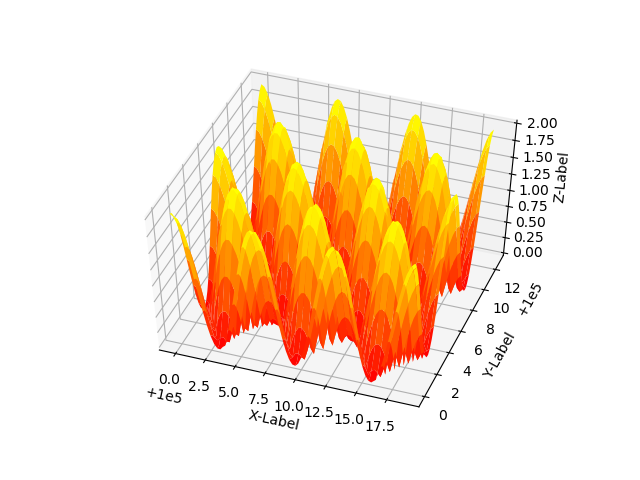

In [1]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D   #'3d' projectionに必要。
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.abs(np.cos(X) + np.cos(Y))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

plt.show()

## アニメーション
MatPlotLibはアニメーションもできると謳っているが、正直言って、gnuplotやMatPlotLibのようなプロッティングプログラムで、アニメーションを無理矢理描くことはあまり良い考えとは思えない。

## フォント
フォントが気にいらない人(私)は、[ここ](http://nucl.hatenablog.com/entry/2016/05/16/165345)にフォントの差し替え方が説明されている。ちょっとややこしいのでおすすめしない。

# 使用例

ミク関数を作ってみよう。ミク関数とは、グラフにプロットすると初音ミクの姿になるような関数である。→ https://nlab.itmedia.co.jp/nl/articles/1305/02/news063.html

平面上の任意の曲線は、あたりまえだがペンを動かせば描くことができる。ペンを下ろした時刻を0とし、その後の時刻$t$でのペンの位置(座標)$(x,y)$を、時刻$t$の関数と考える。線がとぎれると面倒なので、ペンは最後まで上げないことにしよう(一筆書)。

すると、どんな風にペンを動かすかはともかく、ペンの動きを時間の関数としてプロットできるはずだ。

例えば、時刻0に原点を出発し、時刻1に座標(10,0)、時刻2に座標(10,20)、時刻3に座標(0,20)、そして時刻4で(0,0)に戻ってくれば、10x20の長方形を描ける。この時のペンのx座標とy座標の関数は次のように描ける。

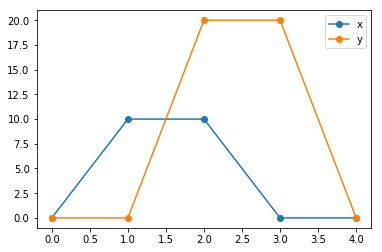

In [27]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

points=np.array([[0,0,0],[1,10,0],[2,10,20],[3,0,20],[4,0,0]])

plt.plot(points[:,0],points[:,1], "-o", label="x")
plt.plot(points[:,0],points[:,2], "-o", label="y")
plt.legend()

x座標とy座標を対応させてプロットするとたしかに長方形になる。

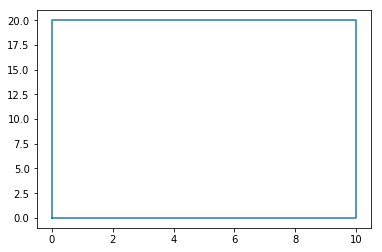

In [22]:
plt.plot(points[:,1], points[:,2])

これを、いかにも関数っぽく見せるために、わざとこの折れ線を何らかのスムーズな関数で近似して、時間の連続関数として表すのである。例えば3次多項式で近似してみることにする。

numpyのpolyfitを使う。まずはx座標。

In [9]:
coeffx3 = np.polyfit(points[:,0], points[:,1], 3)
coeffx3

array([  1.66666667, -12.14285714,  21.9047619 ,  -0.28571429])

結果は3次多項式の係数のようだ。これらを係数にもつ3次関数の値はpoly1d関数で生成できる。

In [17]:
# tは0〜4を21に細分した点
t = np.linspace(0,4,21)

# poly1dはtそれぞれでの3次関数の値を計算する
xx = np.poly1d(coeffx3)(t)
print(t)
print(xx)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
[-0.28571429  3.62285714  6.64        8.84571429 10.32       11.14285714
 11.39428571 11.15428571 10.50285714  9.52        8.28571429  6.88
  5.38285714  3.87428571  2.43428571  1.14285714  0.08       -0.67428571
 -1.04       -0.93714286 -0.28571429]


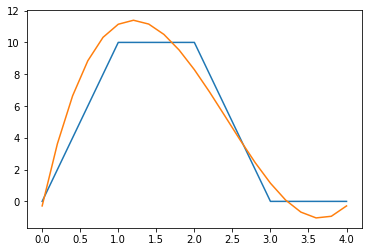

In [19]:
plt.plot(points[:,0],points[:,1], label="raw x")
plt.plot(t, xx, label="fit x (3)")

同じように、yもフィットする。

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
[-0.57142857 -1.87428571 -2.08       -1.34857143  0.16        2.28571429
  4.86857143  7.74857143 10.76571429 13.76       16.57142857 19.04
 21.00571429 22.30857143 22.78857143 22.28571429 20.64       17.69142857
 13.28        7.24571429 -0.57142857]


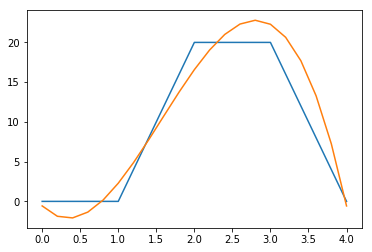

In [20]:
coeffy3 = np.polyfit(points[:,0], points[:,2], 3)
# poly1dはtそれぞれでの3次関数の値を計算する
yy = np.poly1d(coeffy3)(t)
print(t)
print(yy)
plt.plot(points[:,0],points[:,2], label="raw y")
plt.plot(t, yy, label="fit y (3)")

フィットした曲線でプロットすると?

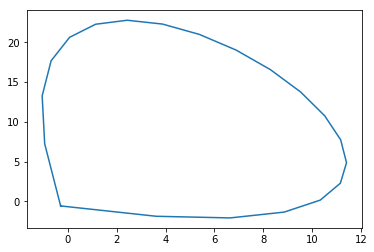

In [23]:
plt.plot(xx,yy)

長方形からはだいぶ外れてしまった。でも、中間点を増やし、フィットする関数の次数を上げてやれば、もう少し長方形らしくできる、はず。

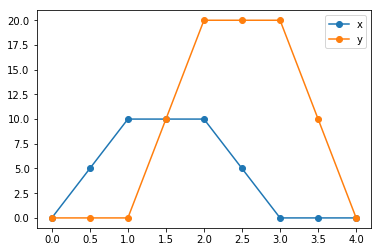

In [32]:
points=np.array([[0,0,0],[0.5,5,0],[1,10,0],[1.5,10,10],[2,10,20],[2.5,5,20],[3,0,20],[3.5,0,10],[4,0,0]])

plt.plot(points[:,0],points[:,1], "-o", label="x")
plt.plot(points[:,0],points[:,2], "-o", label="y")
plt.legend()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
[-0.05439005  2.5386966   4.48089401  6.16502044  7.72566238  9.12975913
 10.25353409 10.94577271 11.07744711 10.57768737  9.45609946  7.81142984
  5.82657681  3.74994837  1.86316691  0.43512044 -0.33763943 -0.40415289
  0.05403937  0.52233409  0.03885004]


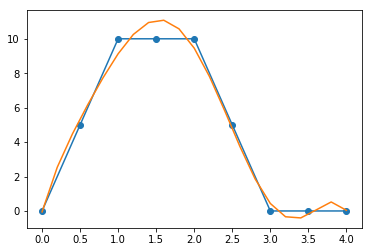

In [37]:
coeffx6 = np.polyfit(points[:,0], points[:,1], 6)
# poly1dはtそれぞれでの6次関数の値を計算する
xx = np.poly1d(coeffx6)(t)
print(t)
print(xx)
plt.plot(points[:,0],points[:,1], "-o", label="raw x")
plt.plot(t, xx, label="fit x (6)")

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
[ 0.07770008  1.04466817  0.10807874 -0.80830578 -0.67527887  0.87024087
  3.72633381  7.49989674 11.65315362 15.62285969 18.91219891 21.15537474
 22.15489422 21.89154541 20.50706817 18.25951826 15.45132477 12.33004089
  8.96178802  5.07739321 -0.10878011]


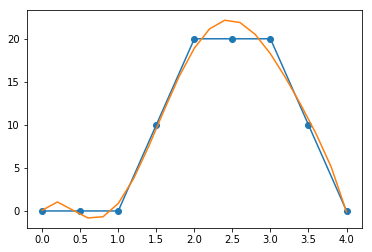

In [38]:
coeffy6 = np.polyfit(points[:,0], points[:,2], 6)
# poly1dはtそれぞれでの6次関数の値を計算する
yy = np.poly1d(coeffy6)(t)
print(t)
print(yy)
plt.plot(points[:,0],points[:,2], "-o", label="raw y")
plt.plot(t, yy, label="fit y (6)")

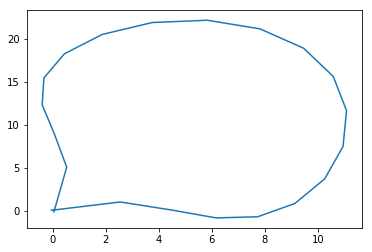

In [39]:
plt.plot(xx,yy)

まだまだですね。でもこんな感じで、点の数をうんと増やしていけば、どんな複雑な曲線でも数式で表せます。多項式や三角関数でフィットする場合には、もとの図形も角がないほうがうまくフィットできます。

# 宿題
ひらがなの「の」のような、一筆で書ける文字を1つ選び、それを表す関数$x(t), y(t)$を作って下さい。